# Random Walk’s Data Science Assessment


Provided are 3 CSV files books.csv, book_tags.csv and ratings.csv for the assessment.

Candidate must create a jupyter notebook which processes the data provided in the CSV files to solve the following questions within the time limit provided.

How many books do not have an original title [books.csv]?

How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

How many unique users are present in the dataset [ratings.csv] ?

How many unique tags are there in the dataset [book_tags.csv] ?

Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

Required imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

### Q1: How many books do not have an original title [books.csv]?
### Ans: 36    

In [12]:
dataframe=pd.read_csv('books.csv')
no_og_title = dataframe['original_title'].isnull().sum()
print('The number of books that dont have orginal title:',no_og_title)


The number of books that dont have orginal title: 36


### Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.
### Ans: The number of unique books present in dataset are : 363 books

In [13]:
# dropna() is used to drop the rows that have null values
clean_dataframe = dataframe.dropna(subset=['original_title'])
n_unique_bookid=clean_dataframe['book_id'].nunique()
print("The number of unique books, based on the book_id column are: ",n_unique_bookid)


The number of unique books, based on the book_id column are:  363
The number of unique values in book_id column 0


### Q2 How many unique users are present in the dataset [ratings.csv] ?
### Ans: 40836

In [15]:
ratings_data=pd.read_csv('ratings.csv')

In [16]:
n_unique_user=ratings_data['user_id'].nunique()
print("The number of unique users, based on the user_id column are: ",n_unique_user)

The number of unique users, based on the user_id column are:  40836


###  Q3 How many unique tags are there in the dataset [book_tags.csv] ?
### Ans: The number of unique tag, based on the tag_id column are:  3651


In [19]:
tags_data=pd.read_csv('book_tags.csv')

In [20]:
n_unique_tag=tags_data['tag_id'].nunique()
print("The number of unique tag, based on the tag_id column are: ",n_unique_tag)

The number of unique tag, based on the tag_id column are:  3651


### Q4:Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.
### Ans: Most frequently used tag_id e is  4600

In [23]:
tag_counts = tags_data['tag_id'].value_counts()

# Find the tag_id with the highest count (most frequently used)
fq_tag_id = tag_counts.idxmax()
fq_tag_id = min(tag_counts[tag_counts == tag_counts.max()].index)
print("Most frequently used tag is ",fq_tag_id)

Most frequently used tag is  4600


### Q5: Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

### Ans: 'Another Bullshit Night in Suck City'

In [24]:
gr_counts = tags_data['goodreads_book_id'].value_counts()

# Find the tag_id with the highest count (most frequently used)
fq_gr_id = gr_counts.idxmax()
fq_gr_id = min(gr_counts[gr_counts == gr_counts.max()].index)
print("Most frequently used goodreads_id is ",fq_gr_id)

Most frequently used goodreads_id is  386


In [28]:
result = dataframe.loc[dataframe['goodreads_book_id'] == fq_gr_id, 'title']
print("Which book (title) has the most number of counts of tags given by the user ",result.values)

Which book (title) has the most number of counts of tags given by the user  ['Another Bullshit Night in Suck City']


### Q6:  Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]


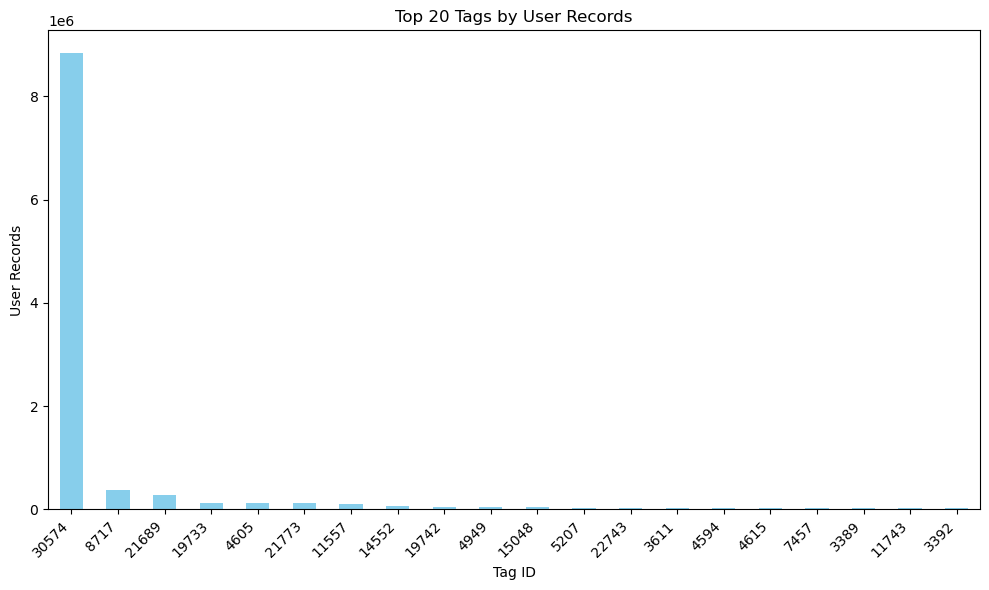

In [29]:
book_tags_df = pd.read_csv('book_tags.csv')

tag_user_counts = book_tags_df.groupby('tag_id')['count'].sum()

top_20_tags = tag_user_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('User Records')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()